# ADM HW 2. Questions 1,2,4,7

In [1]:
#Loading datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/home/dias/Desktop/HW/2019-Dec.csv')
name ='December'
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e


In [ ]:
#Setting numbers to show in float 
pd.set_option('float_format', '{:f}'.format)

In [3]:
#Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67542878 entries, 0 to 67542877
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [4]:
df.describe()

,product_id,category_id,price,user_id
count,67542878.000000,67542878.000000,67542878.000000,67542878.000000
mean,17620809.849287,2179055916185898752.000000,274.798687,548121014.032983
std,27300708.262594,81666647132787552.000000,348.046850,28593302.516716
min,1000544.000000,2053013551865397504.000000,0.000000,29515875.000000
25%,1005266.000000,2053013563718501120.000000,61.490000,518841839.000000
50%,5300079.000000,2232732093077520640.000000,154.420000,546876612.500000
75%,21403908.000000,2232732097708032512.000000,332.030000,573986217.000000
max,100064491.000000,2232732138325672448.000000,2574.070000,595414563.000000


In [5]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels? 

In [6]:
df.event_type.unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [7]:
#Here I group all event_time values by product_id and user_id 
table1 = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=len)
a=table1.dropna()
complete_funnels = a.min(axis=1).sum()
#I drop rows where at least one of them wasn't made, count sum and divide by total length
print('Rate of complete funnels in {} = {}'.format(name,complete_funnels/len(table1)))

Rate of complete funnels in December = 0.03259664228979582


### What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

In [9]:
#Here I grouped by session and took all average numbers of events in event_type
mean=[]
for i in df.event_type.unique():
    mean.append(df[df.event_type == i].groupby(['user_session']).event_type.count())
for i in range(len(mean)):
    mean[i]=mean[i].mean()
mean

[4.043303927731845, 1.197981453703847, 1.7115020163983934]

The operation users repeat more on average within a session in December: 


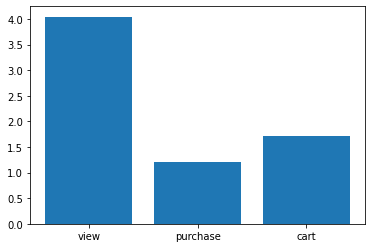

In [13]:
#and then plot a bar, and took tha name of event with highest number
plt.bar(df.event_type.unique(),mean);
print('The operation users repeat more on average within a session in {}: '.format(name, df.event_type.unique()[0]))

### How many times, on average, a user views a product before adding it to the cart?

In [14]:
#I made a pivot table of the times of first events that users made
table = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=min)
table

event_type           cart purchase                     view
product_id user_id                                         
1000544    515597091  NaN      NaN  2019-12-19 11:34:11 UTC
1000894    512384604  NaN      NaN  2019-12-26 14:12:09 UTC
           512406132  NaN      NaN  2019-12-21 08:47:06 UTC
           512457055  NaN      NaN  2019-12-21 20:31:50 UTC
           512459247  NaN      NaN  2019-12-20 14:48:36 UTC
...                   ...      ...                      ...
100064457  591108684  NaN      NaN  2019-12-31 08:58:14 UTC
100064485  556595700  NaN      NaN  2019-12-31 11:28:57 UTC
100064486  512796932  NaN      NaN  2019-12-31 16:44:57 UTC
100064488  527551554  NaN      NaN  2019-12-31 10:45:26 UTC
100064491  543021026  NaN      NaN  2019-12-31 21:32:47 UTC

[35258969 rows x 3 columns]

In [15]:
#and then counted probability of user to view a product before buying
answer = len(table[table['view']<table['cart']])/len(table)
answer

0.04968894581120622

### What’s the probability that products added once to the cart are effectively bought?

In [16]:
# the same pivot from above, counting all rows with time of 'cart' before the 'purchase' and divide by total length
answer = len(table[table['cart']<table['purchase']])/len(table['cart'].dropna())
answer

0.48668348277534684

## [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. 

In [19]:
import seaborn as sns
#split category_code into 'category' and 'subcategory' columns
df[['category', 'subcategory']] = df['category_code'].str.split('.', 1, expand=True)
#count number of purchases of products and sort in descending order
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['product_id','category']).count()

In [20]:
group_purchase_by_cat['user_id'].sort_values(ascending=False).head(10)
#As you can see the category of most trending products is electronics

product_id  category    
1004856     construction    34545
1004767     construction    34256
1005115     construction    26464
1005100     construction    23457
4804056     sport           22496
1002544     construction    18606
1004870     construction    13637
1005212     construction    12071
1004249     construction    11435
1005160     construction    10850
Name: user_id, dtype: int64

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of purchases')

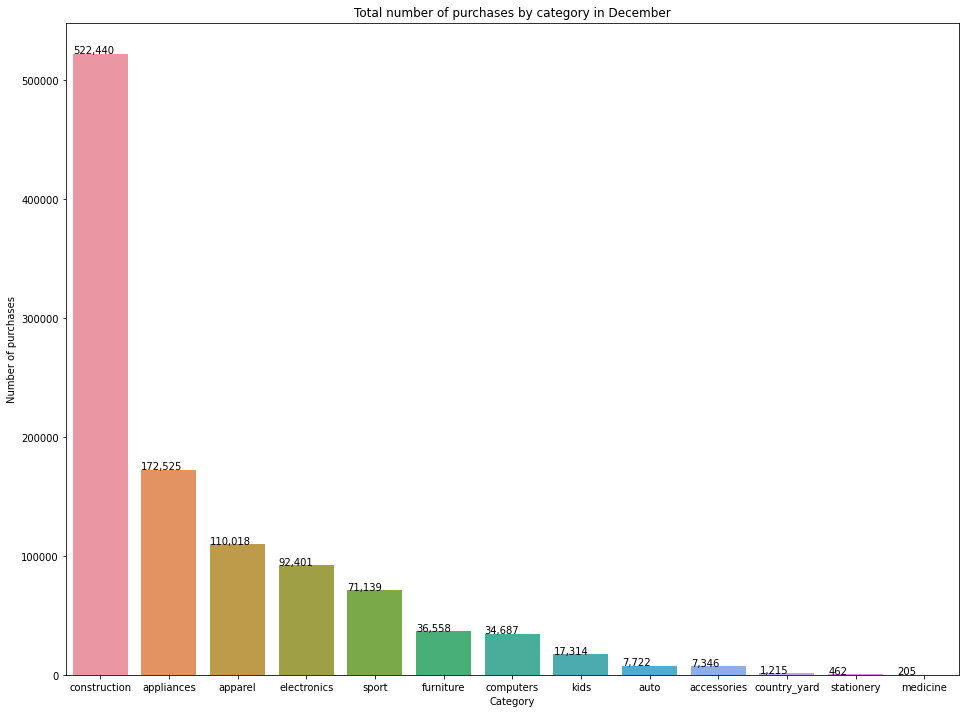

In [21]:
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['category'])['price'].count()
sorted_group_purchase_by_cat = group_purchase_by_cat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_purchase_by_cat.index]
ax= sns.barplot(index_category,sorted_group_purchase_by_cat)
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('Total number of purchases by category in {}'.format(name))
plt.xlabel('Category')
plt.ylabel('Number of purchases')

### Plot the most visited subcategories.

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of views')

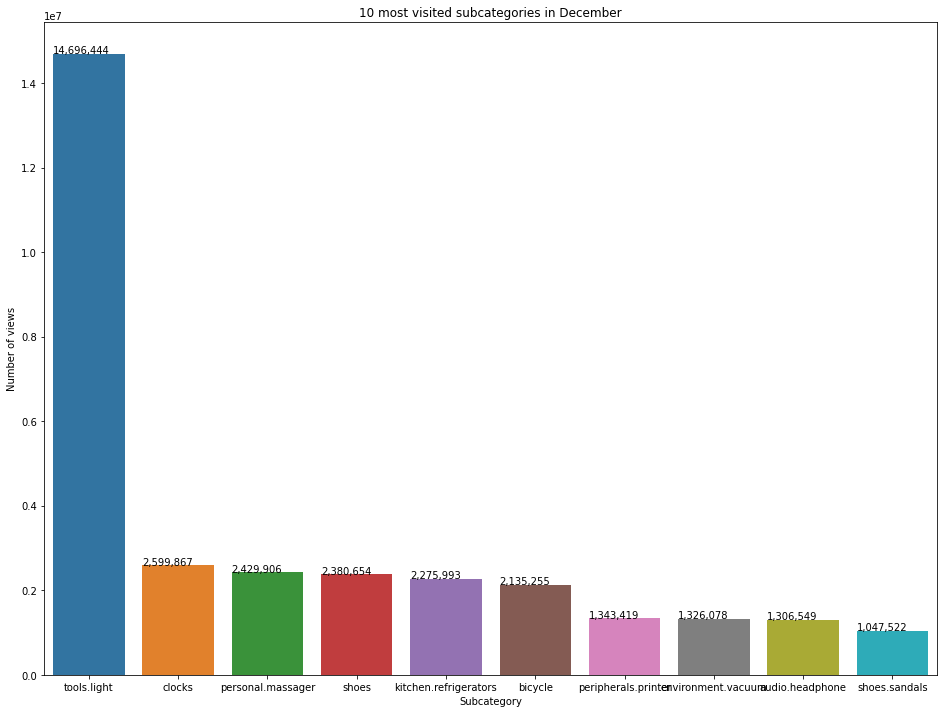

In [22]:
group_view_by_subcat=df[df['event_type']=='view'].groupby(['subcategory'])['price'].count()
sorted_group_view_by_subcat = group_view_by_subcat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_view_by_subcat.index]
ax= sns.barplot(index_category[:10],sorted_group_view_by_subcat[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('10 most visited subcategories in {}'.format(name))
plt.xlabel('Subcategory')
plt.ylabel('Number of views')

### What are the 10 most sold products per category?

In [25]:
#Delete nan in order to avoid error
bf = df['category'].unique()
for i in bf:
    try:
        #make pivot table for each category, and sort values in descending order
        table4 = pd.pivot_table(df[df['category']==i], values='event_time', index=['category','product_id'],
                        columns=['event_type'], aggfunc=len)
        print(table4['purchase'].dropna().sort_values(ascending =False)[:9])
    except:
        print('No purchases in {}'.format(i))

category      product_id
construction  1004856      34545.000000
              1004767      34256.000000
              1005115      26464.000000
              1005100      23457.000000
              1002544      18606.000000
              1004870      13637.000000
              1005212      12071.000000
              1004249      11435.000000
              1005160      10850.000000
Name: purchase, dtype: float64
No purchases in nan
category    product_id
appliances  1005174      6176.000000
            1801690      3908.000000
            1801766      2805.000000
            3700926      2656.000000
            1005186      2463.000000
            1801881      2240.000000
            3600661      1871.000000
            3601405      1867.000000
            1801805      1622.000000
Name: purchase, dtype: float64
category   product_id
computers  3300349      867.000000
           26400266     758.000000
           26400293     655.000000
           1307136      616.000000
           2640

## [RQ4] How much does each brand earn per month? 

In [26]:
#made a pivot table to sum the selling price per each brand
brand_sum = pd.pivot_table(df, values='price', index=['brand'],
                    columns=['event_type'], aggfunc=sum)
brand_sum

event_type,cart,purchase,view
brand,,,
a-case,5252.050000,1039.720000,268144.730000
a-derma,468.940000,95.450000,8026.190000
a-elita,271.550000,112.740000,22214.410000
a-mega,360.570000,133.850000,13270.350000
aardwolf,895.130000,278.590000,26968.840000
...,...,...,...
zwerg,nan,nan,861.090000
zwilling,246.360000,nan,91850.580000
zwillingjahenckels,3793.560000,nan,884861.330000


In [27]:
#How much does each brand earn per month?
brand_revenue = brand_sum['purchase'].sort_values(ascending=False)
brand_revenue

brand
apple                157396674.900029
samsung               71858811.049990
xiaomi                16580776.320002
huawei                 7636198.870001
lg                     6754885.630000
                           ...       
zoops                             nan
zwerg                             nan
zwilling                          nan
zwillingjahenckels                nan
zx                                nan
Name: purchase, Length: 4637, dtype: float64

### Write a function that given the name of a brand in input returns, for each month, its profit.

In [28]:
# Function that given the name of a brand in input returns, for each month, its profit. 
def profit_of_brand(brand_name,month):
    return month['purchase'][brand_name]

def profit_of_brand_for_each_month(brand_name,list_of_months):
    return [i['purchase'][brand_name] for i  in list_of_months]

### Is the average price of products of different brands significantly different? 

In [29]:
#Is the average price of products of different brands significantly different? 

table3 = pd.pivot_table(df, values='price', index=['subcategory','brand'],

                    columns=['event_type'], aggfunc='mean')
table3[:50]


event_type                                     cart   purchase       view
subcategory             brand                                            
accessories.alarm       absolutechampion  44.121200  44.018000  44.337394
                        appollo           54.060000        nan  54.793082
                        asrock           130.497778 128.980000 132.661073
                        asus             181.620000 181.620000 181.841613
                        autoline         354.710000 354.710000 346.740990
                        body-solid       341.320000        nan 341.320000
                        centurion         25.480000  25.480000  25.480000
                        dds              250.591852 250.537879 250.717277
                        dsk               72.190000        nan  72.201294
                        kenwood          113.260000        nan 113.260000
                        kgb               84.940000  84.940000  84.940000
                        mydean           175.034000 244.535000 202.013291
                        pandora          176.556842 181.310909 156.565114
                        pioneer           64.350000  64.350000  64.350000
                        romana            49.780000        nan  49.780000
                        scher-khan        83.225000        nan  78.108797
                        silapro           15.960000  15.960000  15.960000
                        sparta            29.320000  29.320000  29.320000
                        spektrsport             nan        nan  39.380000
                        starline         167.704063 172.615833 150.565368
                        tec                     nan        nan 352.650000
                        tomahawk          94.953889  94.210000  94.344348
                        torneo            22.650000        nan  22.650000
                        tuka              16.730000  16.730000  16.730000
                        uralsport         47.620000  47.620000  47.620000
accessories.anti_freeze adel              27.062000        nan  28.253782
                        alexrojo                nan        nan  38.610000
                        alvitek           19.626250  18.095333  19.165357
                        barokko           11.963235  11.842500  11.871785
                        bartek            60.490000  60.490000  60.490000
                        belezza                 nan        nan  19.168400
                        biomecanics       35.780000        nan  35.474667
                        boarteks          28.920000        nan  28.339630
                        bugaboo                 nan        nan 141.550000
                        butterfly               nan        nan  27.844667
                        casaconforte            nan        nan  17.778974
                        ekonomia                nan        nan  18.440000
                        elegant           20.956667  18.210000  16.895138
                        garvalin          40.755000  38.870000  38.536843
                        intex                   nan        nan  34.750000
                        kroskaa                 nan        nan  22.847308
                        lealelo                 nan        nan  52.770000
                        merry             30.120000  30.120000  26.351071
                        minimen                 nan        nan  43.009667
                        neposeda          25.230000  25.230000  25.231342
                        pablosky          58.690000        nan  46.578626
                        perina                  nan        nan  16.610000
                        sherlock          20.540000  20.350000  20.247627
                        stolicatekstila   32.861333  30.910000  31.049762
                        tekstilnaalavka         nan        nan  21.270000

##  [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

    Prove that the pareto principle applies to your store.


In [30]:
group_purchase_by_user=df[df['event_type']=='purchase'].groupby(['user_id'])['price'].sum()
sorted_group_purchase_by_user = group_purchase_by_user.dropna().sort_values(ascending=False)
sorted_group_purchase_by_user
#Group by user and sort all purchases by descending order

user_id
553431815   412666.920000
569333570   280578.410000
513901034   252290.040000
568782581   223156.520000
549109608   173208.450000
                 ...     
568192019        0.860000
514423158        0.860000
523315414        0.850000
560501168        0.830000
571120707        0.770000
Name: price, Length: 500997, dtype: float64

In [31]:
group_purchase_by_product=df[df['event_type']=='purchase']['price'].sum()
group_purchase_by_product
#get all the revenue that was made in this month

344176829.14

Percent of money 20 % of customers gave out of total 344176829.14: 71.76245784388279%


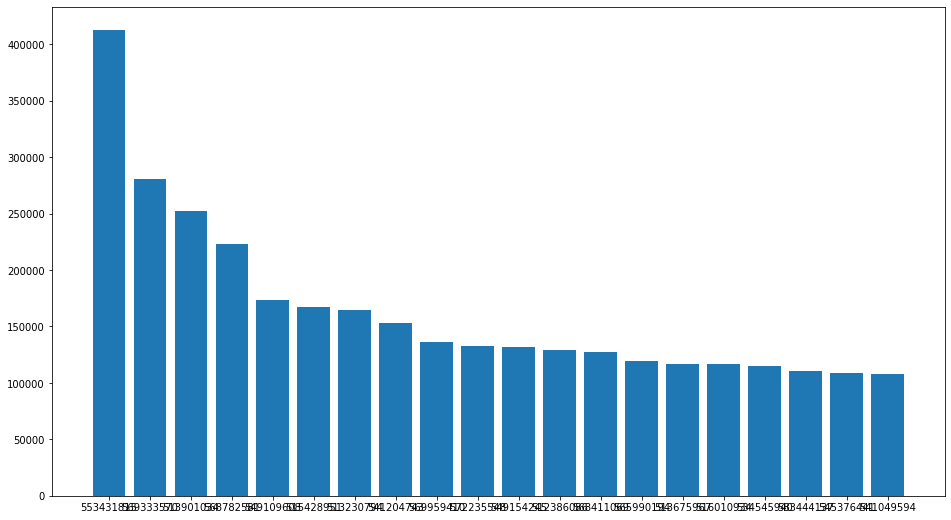

In [32]:
plt.figure(figsize =(16, 9)) 
amount_of_20percent_customers = len(sorted_group_purchase_by_user) * 0.2
#Count % of money that 20% of top customers gave
index_user = [str(i) for i in sorted_group_purchase_by_user.index]
plt.bar(index_user[:20],sorted_group_purchase_by_user[:20])
print('Percent of money 20 % of customers gave out of total {}: {}%'.format(group_purchase_by_product,sum(sorted_group_purchase_by_user[:int(amount_of_20percent_customers)]) /(group_purchase_by_product/100) ))